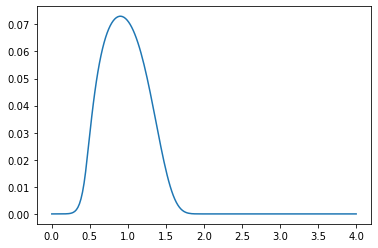

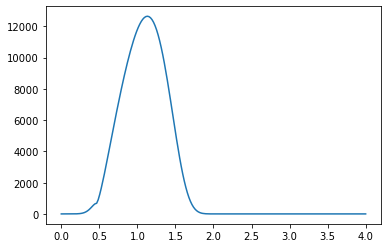

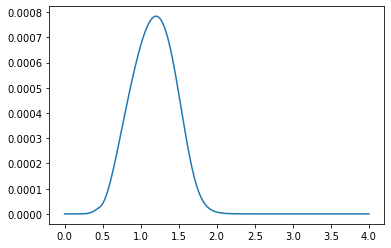

Media in 2ms: 297.3 uM


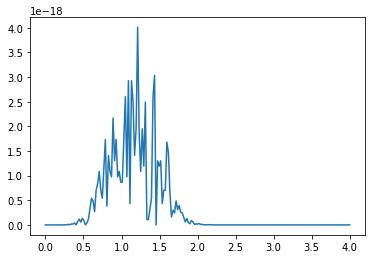

'prova = np.array([[np.random.logistic(Ca_conc_avg[i], (std_to_s*Ca_conc_std[i])) for i in range(N)] for j in range(N_ITER)])\nplt.plot(x_axis, np.mean(prova, axis=0))\nplt.show()\nplt.plot(x_axis, np.std(prova, axis=0))\nprint("prova valori dati: %f, %f " %( 10, 15))\np1 = np.array([[np.random.logistic(10, std_to_s*15) for i in range(1000)] for j in range(100)])\nprint("valori che escono: %f %f"%(np.mean(p1), np.std(p1)))'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import AP
import calciumDynamics as CD

importlib.reload(CD)

TIME_STEP = 0.02 #ms
T_TOT = 4
N = int(T_TOT // TIME_STEP)

my_spike = AP.Spike(
    total_width=T_TOT,
    t_peak=0.5,
    t_under=2,
    v_rest=-65,
    v_peak=40,
    v_under=-80
)

noise = {
    "active": False,
    "an": 250,
    "ap": 350
}

spike_pulse = AP.SpikePulse(my_spike, TIME_STEP)
v = spike_pulse.getValues()
x_axis = np.linspace(0, spike_pulse.p.total_width, spike_pulse.N)

N_ITER = 200

S = np.zeros((5, N))
S[0, 0] = 0.1
influx = np.zeros(N)
Ca_VGCCs = np.zeros((N_ITER, N))

S_sum = np.zeros((5, N))
S_sum[0, 0] = 0.1
influx_sum = np.zeros(N)

for j in range(N_ITER):
    for i in range(1, N):
        S[:, i] = CD.updateState(S[:, i-1], v[i], TIME_STEP)
        influx[i] = CD.influx(S[4, i-1], v[i], noise, TIME_STEP)
        Ca_VGCCs[j, i] = Ca_VGCCs[j, i-1]*0.8 + influx[i]
    S_sum += S
    influx_sum += influx

S = S_sum / N_ITER
influx = influx_sum / N_ITER
Ca_conc = CD.CalciumMoleculesToConcentration(Ca_VGCCs)
Ca_conc_avg = np.mean(Ca_conc, axis=0) 
Ca_conc_std = np.std(Ca_conc, axis=0)

plt.plot(x_axis, S[4, :])
plt.show()

plt.plot(x_axis, influx)
plt.show()
plt.plot(x_axis, Ca_conc_avg)
plt.show()
print("Media in 2ms: %.1f uM" % np.mean(1e6*Ca_conc_avg[:100]))
plt.plot(x_axis, Ca_conc_std)
plt.show()
std_to_s = 3**0.5/np.pi
"""prova = np.array([[np.random.logistic(Ca_conc_avg[i], (std_to_s*Ca_conc_std[i])) for i in range(N)] for j in range(N_ITER)])
plt.plot(x_axis, np.mean(prova, axis=0))
plt.show()
plt.plot(x_axis, np.std(prova, axis=0))
print("prova valori dati: %f, %f " %( 10, 15))
p1 = np.array([[np.random.logistic(10, std_to_s*15) for i in range(1000)] for j in range(100)])
print("valori che escono: %f %f"%(np.mean(p1), np.std(p1)))"""